#**Prodigy Infotech**

**Abdallah Fekry Mohammed**

ML Internship

Task_4: Hand Gesture Classification

Deep Learning - Convolutional Neural Network CNN

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import vgg16
from keras.src.layers.pooling.average_pooling2d import AvgPool2D
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout
from keras.models import Sequential
from keras.layers import Dense,Input,Flatten
from tensorflow.keras.utils import load_img,img_to_array
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator

Gesture Classes

In [98]:
values = {0:'palm',1:'l',2:'fist',3:'fist_moved',4:'thumb',5:'index',6:'ok',7:'palm_moved',8:'c',9:'down'}

In [51]:
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

train_data = train_datagen.flow_from_directory('/kaggle/input/leapgestrecog/leapGestRecog/00/',
                                               target_size=(224,224),
                                               batch_size=200,
                                               class_mode='categorical',
                                               shuffle=False,
                                               subset='training')
test_data = train_datagen.flow_from_directory('/kaggle/input/leapgestrecog/leapGestRecog/00/',
                                               target_size=(224,224),
                                               batch_size=200,
                                               class_mode='categorical',
                                               shuffle=False,
                                               subset='validation')
train_data.labels

Found 1600 images belonging to 10 classes.
Found 400 images belonging to 10 classes.


array([0, 0, 0, ..., 9, 9, 9], dtype=int32)

In [52]:
train_data.image_shape

(224, 224, 3)

In [55]:
np.unique(test_data.labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [8]:
test_data[0][1]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
vgg16_model = vgg16.VGG16(include_top=False, input_shape=(224,224,3))
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
for layer in vgg16_model.layers[:]:
  layer.trainable = False
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
model = Sequential()
model.add(vgg16_model)
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 4096)              102764544 
                                                                 
 dense_1 (Dense)             (None, 4096)              16781312  
                                                                 
 dropout (Dropout)           (None, 4096)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                40970     
                                                                 
Total params: 134301514 (512.32 MB)
Trainable params: 11

In [13]:
np.unique(test_data.labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [14]:
len(test_data)

2

In [16]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# from tensorflow import SparseCategoricalCrossentropy
# model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
batch_size=128
from tensorflow import keras
results = model.fit(train_data, epochs=100, validation_data=test_data,
                  steps_per_epoch=len(train_data), validation_steps=len(test_data),
                  callbacks=keras.callbacks.EarlyStopping(patience=5, monitor='val_accuracy',restore_best_weights=True)
                  )

Epoch 1/100


I0000 00:00:1708221727.165691    2697 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


8/8 [==============================] - 57s 2s/step - loss: 15.4325 - accuracy: 0.1969 - val_loss: 4.6155 - val_accuracy: 0.3000
Epoch 2/100
8/8 [==============================] - 11s 1s/step - loss: 1.4555 - accuracy: 0.7319 - val_loss: 0.4354 - val_accuracy: 0.9175
Epoch 3/100
8/8 [==============================] - 11s 1s/step - loss: 0.0500 - accuracy: 1.0000 - val_loss: 0.1374 - val_accuracy: 0.9525
Epoch 4/100
8/8 [==============================] - 11s 1s/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1303 - val_accuracy: 0.9425
Epoch 5/100
8/8 [==============================] - 10s 1s/step - loss: 1.2635e-04 - accuracy: 1.0000 - val_loss: 0.1964 - val_accuracy: 0.9325
Epoch 6/100
8/8 [==============================] - 10s 1s/step - loss: 4.0220e-05 - accuracy: 1.0000 - val_loss: 0.2393 - val_accuracy: 0.9250
Epoch 7/100
8/8 [==============================] - 11s 1s/step - loss: 2.5290e-05 - accuracy: 1.0000 - val_loss: 0.2556 - val_accuracy: 0.9200
Epoch 8/100
8/8 [=========

In [38]:
loss , acc = model.evaluate(test_data)

2/2 [==============================] - 3s 885ms/step - loss: 0.1374 - accuracy: 0.9525


In [39]:
print("Test accuracy:", round(acc,4)*100,'%',"\nLoss value:",round(loss,4))

Test accuracy: 95.25 % 
Loss value: 0.1374


In [56]:
yp = model.predict(test_data)
yp = yp.argmax(axis=1)
yp

2/2 [==============================] - 2s 860ms/step


array([3, 8, 8, 0, 0, 8, 8, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,

In [63]:
df = pd.DataFrame({'filename':test_data.filenames,"Actual Value":test_data.labels,"Predicted value":yp})
df.tail()

,filename,Actual Value,Predicted value
395,10_down/frame_00_10_0036.png,9,9
396,10_down/frame_00_10_0037.png,9,9
397,10_down/frame_00_10_0038.png,9,9
398,10_down/frame_00_10_0039.png,9,9
399,10_down/frame_00_10_0040.png,9,9


Heatmap



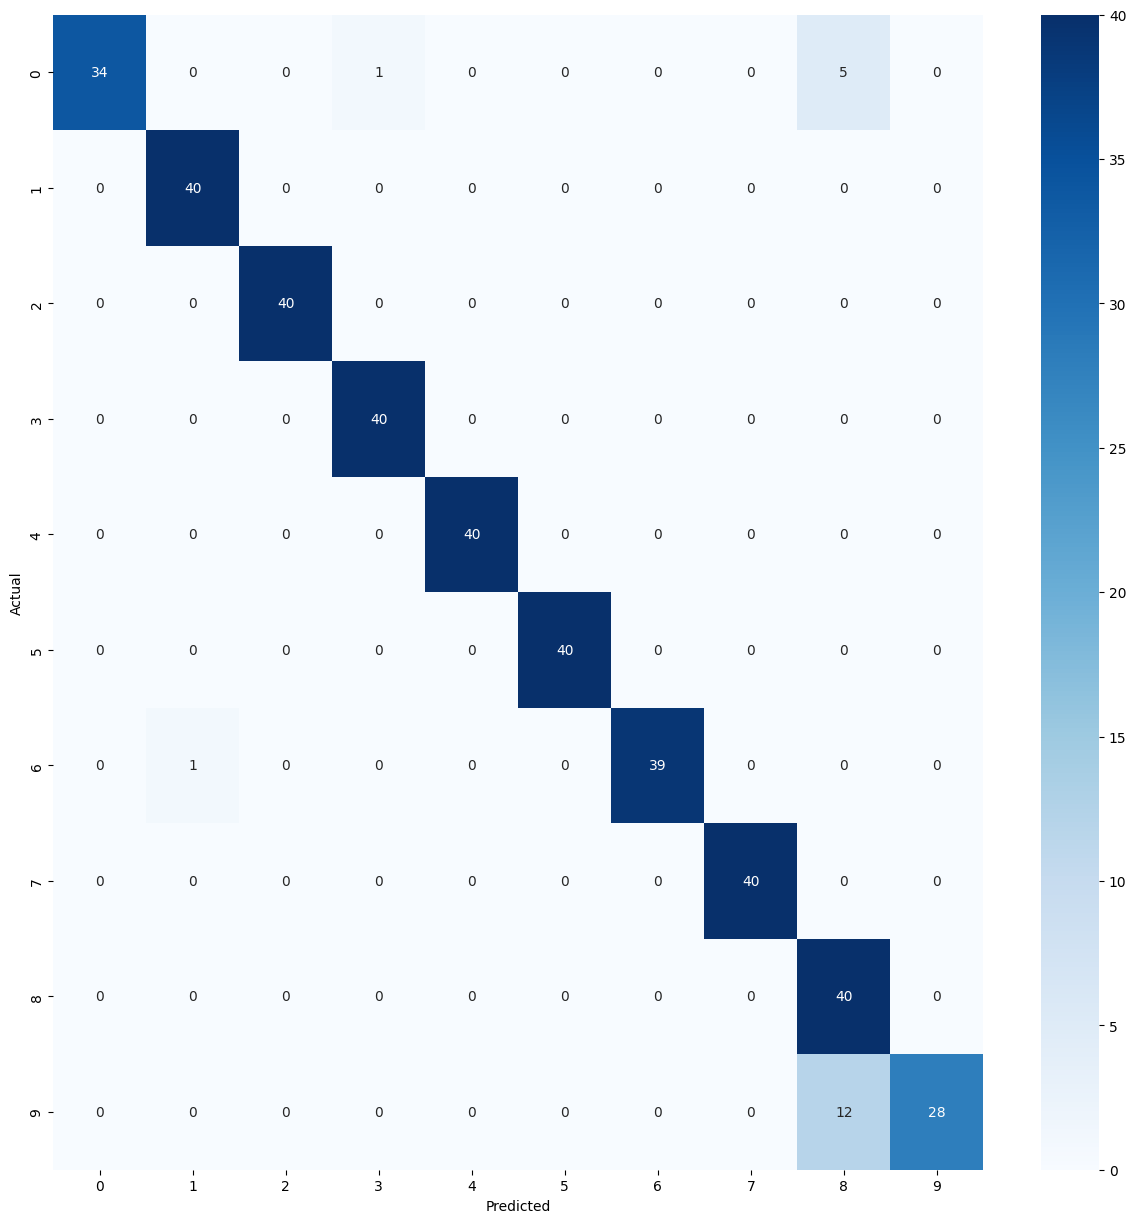

In [70]:
print("Heatmap\n")
m = pd.crosstab(test_data.labels, yp, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(15, 15))
sn.heatmap(m,annot=True, cmap='Blues')
plt.show()

Sample Testing

Palm Sample


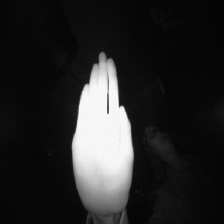

In [86]:
print("Palm Sample")
palm = load_img('/kaggle/input/leapgestrecog/leapGestRecog/00/01_palm/frame_00_01_0024.png',target_size=(224,224))
palm

Fist Sample


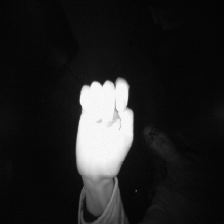

In [87]:
print("Fist Sample")
fist = load_img('/kaggle/input/leapgestrecog/leapGestRecog/00/03_fist/frame_00_03_0005.png',target_size=(224,224))
fist

Text(0.5, 1.0, 'Fist')

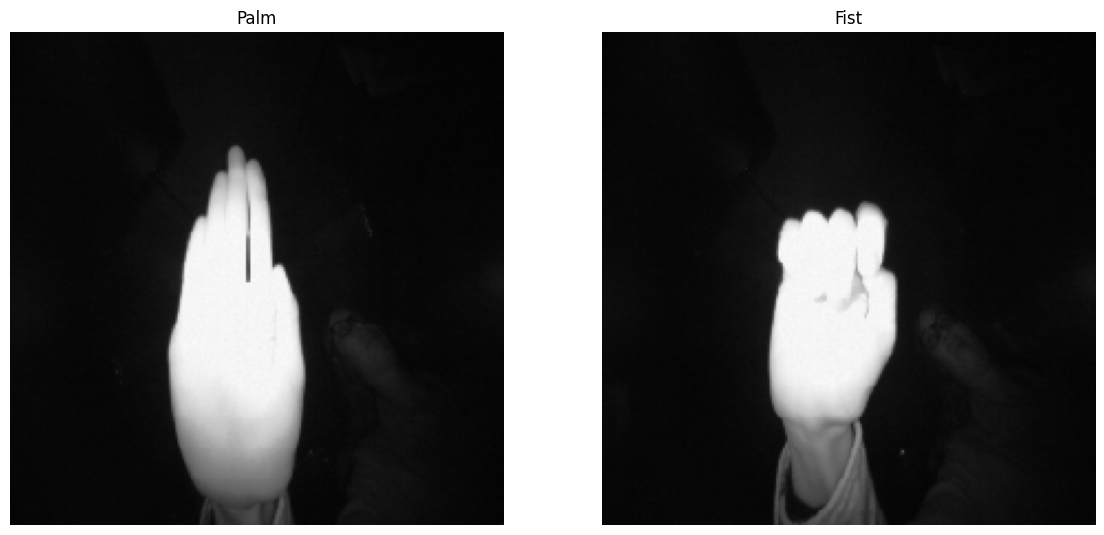

In [88]:
fig = plt.figure(figsize=(14,7))
# plt.grid=False
fig.add_subplot(1, 2, 1)
plt.axis('off')
plt.imshow(palm)
plt.title('Palm')
fig.add_subplot(1, 2, 2)
plt.axis('off')
plt.imshow(fist)
plt.title('Fist')

In [89]:
palm = img_to_array(palm)
fist = img_to_array(fist)
palm = palm/255
fist = fist/255
palm = palm.reshape(1,224,224,3)
fist = fist.reshape(1,224,224,3)
palm.shape

(1, 224, 224, 3)

In [96]:
p1 = (model.predict(palm)).argmax()

print("Class ",p1,": ",values[p1],sep='')

1/1 [==============================] - 0s 18ms/step
Class 0: palm


In [97]:
p1 = (model.predict(fist)).argmax()

print("Class ",p1,": ",values[p1],sep='')

1/1 [==============================] - 0s 20ms/step
Class 2: fist
